In this notebook, we visualize the social-circles discovered by the unsupervised-learning algorithms (refer previous notebook). We look within the social-circles to study the members and meaning for the social-circle identified by the machine. Also, we look at the histogram plot of PageRank score of nodes in the ego-network. 

Interactive Graphics in R (with more granular details) can be found here: https://balaca.shinyapps.io/Twitter_Graph

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;  sns.set()
% matplotlib inline

self_screen_name = 'bala_io'     
cluster_filename = self_screen_name + "_clusters.csv"      # groups/clusters identified 
clusters_df = pd.read_csv(cluster_filename)
clusters_df = clusters_df.set_index('Ids', drop = True)
n_clusters = 10

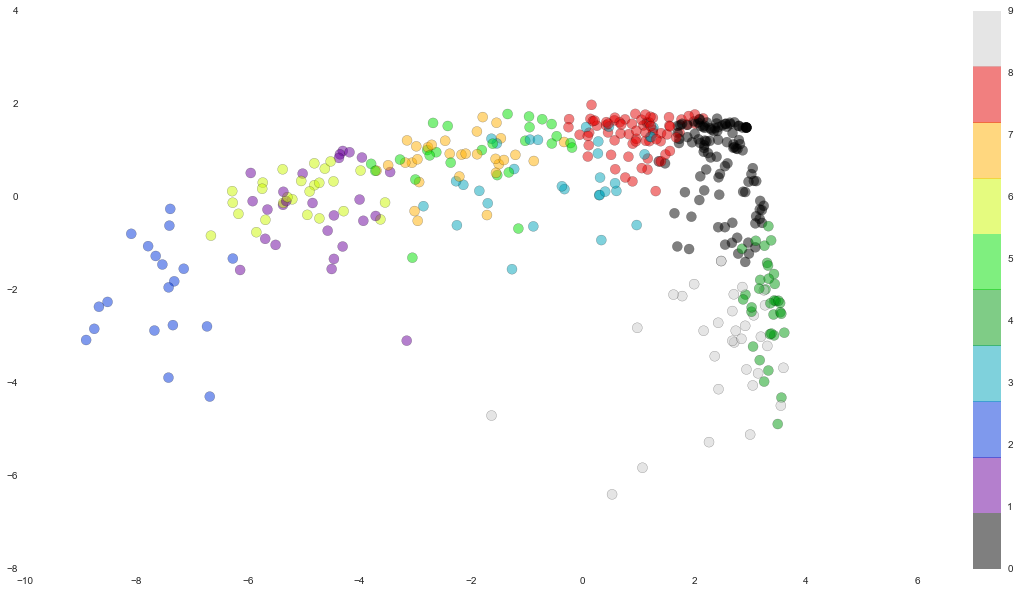

In [2]:
# KMeans clustering | Plot the ego-network in 2 dimensions
# plot the Ids in 2-dimensions as generated by PCA 

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(clusters_df['dim1'], clusters_df['dim2'], s = 100  ,c= clusters_df['kmeans'], 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

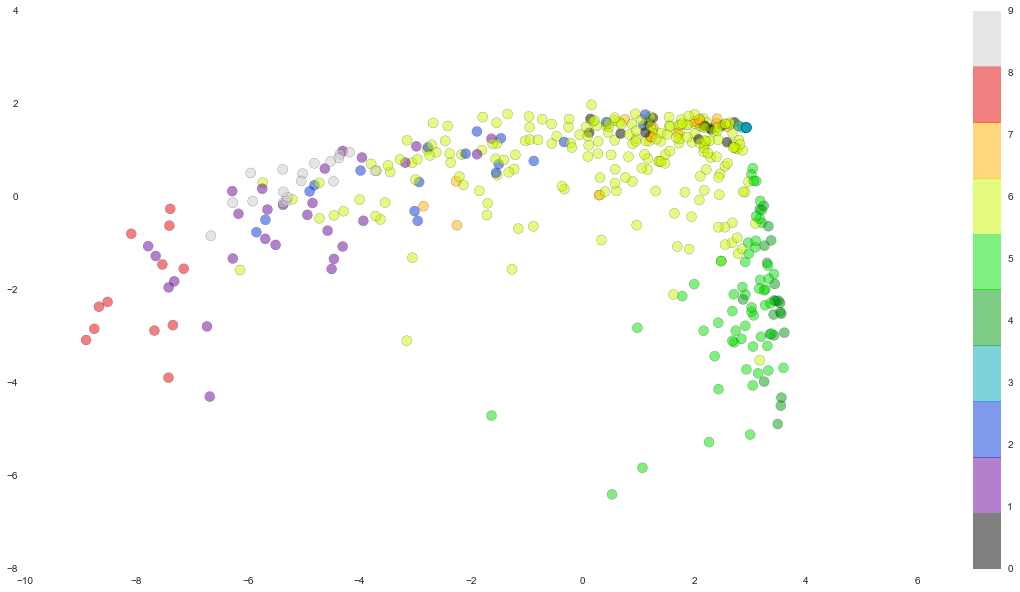

In [3]:
# Spectral clustering | Plot the ego-network in 2 dimensions
# plot the Ids in 2-dimensions as generated by PCA

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(clusters_df['dim1'], clusters_df['dim2'], s = 100  ,c= clusters_df['spectral'], 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [4]:
# Overall Top 100 Influencers in Social-Graph 
dummy_df = pd.DataFrame()
for i in range(10):
    dummy_df[i] = list (clusters_df [10*i : 10* i + 10]['names'])

print "*** Top 100 Influencers in the Ego-Network *** "
dummy_df

*** Top 100 Influencers in the Ego-Network *** 


,0,1,2,3,4,5,6,7,8,9
0,Marc Andreessen,dick costolo,Max Levchin,Biz Stone,Dave McClure,Brad Stone,Jeremy Stoppelman,Pierre Omidyar,Jonah Peretti,David Lee
1,Elon Musk,Paul Graham,Vinod Khosla,Nick Bilton,Satya Nadella,Tony Fadell,Bret Taylor,Ron Conway,Adam D'Angelo,Paul Buchheit
2,Tim O'Reilly,Chris Dixon,WIRED,Tim Cook,Josh Kopelman,Gabe Rivera,Jeff Weiner,John Markoff,Mark Suster,Kevin Weil
3,Om Malik,Ben Horowitz,Benedict Evans,Walt Mossberg,Bradley Horowitz,Liz Gannes,Paul Krugman,John Carmack,danah boyd,steve blank
4,Bill Gates,marissamayer,Steven Levy,Hunter Walk,Steve Case,Naval Ravikant,Paul Kedrosky,Brian Chesky,David Kirkpatrick,Startup L. Jackson
5,Fred Wilson,Chris Sacca,Dave Morin,John Maeda,Josh Elman,Patrick Collison,David Sacks,Steven Sinofsky,brian pokorny,Tim Berners-Lee
6,Reid Hoffman,TechCrunch,Sam Altman,Nate Silver,Hilary Mason,jason,Horace Dediu,Steven Pinker,danprimack,Clayton Christensen
7,Kara Swisher,Bill Gurley,Drew Houston,Joi Ito,Keith Rabois,Sarah Lacy,Peter Fenton,Philip Kaplan,Emily Chang,Kevin Kelly
8,Ev Williams,John Doerr,Chris Anderson,Kevin Rose,Shervin Pishevar,Y Combinator,Jessica Lessin,Re/code,Jeff Clavier,Chamath Palihapitiya
9,Aaron Levie,Eric Schmidt,Mitch Kapor,Bill Gross,mark pincus,Matt Mullenweg,dj patil,Jessica Verrilli,a16z,Jimmy Wales


In [5]:
# KMeans Clustering | Cluster-wise Top-influencers in the discovered clusters 
dummy_df = pd.DataFrame()

for i in range(n_clusters):
    
    nodes_in_cluster = list( clusters_df [clusters_df['kmeans'] == i ]['names'] )     
    if len(nodes_in_cluster) >= 10:            # identify only clusters which are big enough. say size > 20        
        col_name           = str(i) + " : " + str(len(nodes_in_cluster)) + " Ids"
        dummy_df[col_name] = nodes_in_cluster[:10]
        
print "*** KMeans Clustering | Cluster-wise Top-influencers [Cluster-number : # of users in cluster] *** "
dummy_df

*** KMeans Clustering | Cluster-wise Top-influencers [Cluster-number : # of users in cluster] *** 


,0 : 106 Ids,1 : 26 Ids,2 : 19 Ids,3 : 32 Ids,4 : 35 Ids,5 : 26 Ids,6 : 26 Ids,7 : 30 Ids,8 : 70 Ids,9 : 33 Ids
0,Microsoft Research,TechCrunch,Marc Andreessen,WIRED,Wes McKinney,Horace Dediu,John Doerr,Patrick Collison,John Carmack,Hilary Mason
1,Edward Tufte,Vinod Khosla,Elon Musk,John Maeda,Sean J. Taylor,Steven Sinofsky,Benedict Evans,Matt Mullenweg,Tom Hulme,dj patil
2,Steven Strogatz,Steven Levy,Tim O'Reilly,Paul Krugman,chris wiggins,Jessica Verrilli,Dave Morin,Jeremy Stoppelman,Luke Wroblewski,Jeff Hammerbacher
3,Stephen Wolfram,Chris Anderson,Om Malik,John Markoff,Olivier Grisel,Jonah Peretti,Sam Altman,Pierre Omidyar,Craig Mod,Monica Rogati
4,O'Reilly Media,Mitch Kapor,Bill Gates,Steven Pinker,John D. Cook,Kevin Weil,Drew Houston,Philip Kaplan,Irene Au,Drew Conway
5,umair,Biz Stone,Fred Wilson,danah boyd,David Smith,sundarpichai,Tim Cook,Adam D'Angelo,Ray Ozzie,Peter Skomoroch
6,Michael Bernstein,Nick Bilton,Reid Hoffman,steve blank,Yann LeCun,megan quinn,Hunter Walk,David Kirkpatrick,Daniel Burka,Google Research
7,John Resig,Walt Mossberg,Kara Swisher,Tim Berners-Lee,Ryan Rosario,Megan Smith,Kevin Rose,brian pokorny,Scott Kupor,Nathan Yau
8,Stanford Business,Nate Silver,Ev Williams,Clayton Christensen,Lynn Cherny,Bryce Roberts,Satya Nadella,Emily Chang,Vivek Wadhwa,Mike Bostock
9,Bob Sutton,Joi Ito,Aaron Levie,Kevin Kelly,John Foreman,michael abbott,Josh Elman,Paul Buchheit,Larry Gadea,Hadley Wickham


In [6]:
# Spectral Clustering | Cluster-wise Top-influencers in the discovered clusters 
dummy_df = pd.DataFrame()

for i in range(n_clusters):
    
    nodes_in_cluster = list( clusters_df [clusters_df['spectral'] == i ]['names'] )     
    if len(nodes_in_cluster) >= 10:            # identify only clusters which are big enough. say size > 20        
        col_name           = str(i) + " : " + str(len(nodes_in_cluster)) + " Ids"
        dummy_df[col_name] = nodes_in_cluster[:10]
        
print "*** Spectral Clustering | Cluster-wise Top-influencers [Cluster-number : # of users in cluster] *** "
dummy_df

*** Spectral Clustering | Cluster-wise Top-influencers [Cluster-number : # of users in cluster] *** 


,0 : 13 Ids,1 : 28 Ids,2 : 19 Ids,4 : 22 Ids,5 : 57 Ids,6 : 212 Ids,7 : 15 Ids,8 : 12 Ids,9 : 18 Ids
0,Luke Wroblewski,Tim O'Reilly,Sam Altman,Wes McKinney,Hilary Mason,Vinod Khosla,WIRED,Marc Andreessen,Hunter Walk
1,Daniel Burka,Om Malik,Drew Houston,Sean J. Taylor,dj patil,Benedict Evans,John Maeda,Elon Musk,Dave McClure
2,Julie Zhuo,Bill Gates,Patrick Collison,Olivier Grisel,Jeff Hammerbacher,Tim Cook,Clayton Christensen,Fred Wilson,Josh Kopelman
3,Braden Kowitz,Kara Swisher,Bret Taylor,John Myles White,Monica Rogati,Nate Silver,Tom Hulme,Reid Hoffman,Josh Elman
4,Twitter Design,Ev Williams,Ron Conway,John D. Cook,Drew Conway,Satya Nadella,MIT Media Lab,Aaron Levie,Keith Rabois
5,Josh Brewer,marissamayer,Brian Chesky,Ryan Rosario,Peter Skomoroch,Tony Fadell,IDEO,dick costolo,Shervin Pishevar
6,GV Design,TechCrunch,Adam D'Angelo,Lynn Cherny,Google Research,Sarah Lacy,Stanford d.school,Paul Graham,Gabe Rivera
7,Jon Wiley,John Doerr,brian pokorny,Fernando Perez,Nathan Yau,Y Combinator,Co.Design,Chris Dixon,Liz Gannes
8,brynn evans,Eric Schmidt,Paul Buchheit,Guido van Rossum,Mike Bostock,Matt Mullenweg,Diego Rodriguez,Ben Horowitz,Naval Ravikant
9,John Zeratsky,Steven Levy,Andrew Mason,Scientific Python,Hadley Wickham,Jeremy Stoppelman,Tim Brown,Chris Sacca,jason


In [7]:
#tell pandas to display wide tables as pretty HTML tables Ref:CS109
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

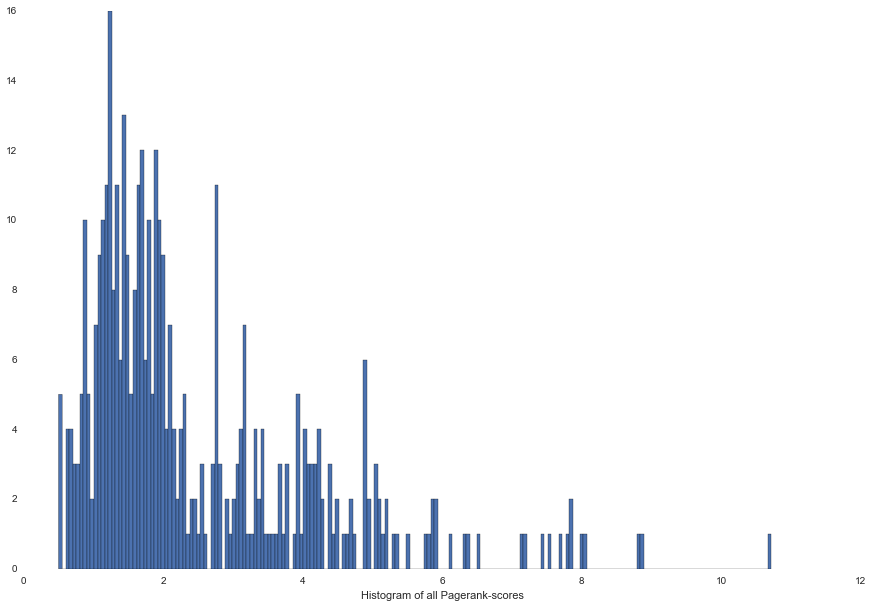

In [8]:
scaled_PageRank_scores =  clusters_df['PageRanks'] * 1000
scaled_PageRank_scores.order().hist(bins = len(clusters_df.index)/2, figsize = (15,10))
plt.xlabel("Histogram of all Pagerank-scores")
remove_border()

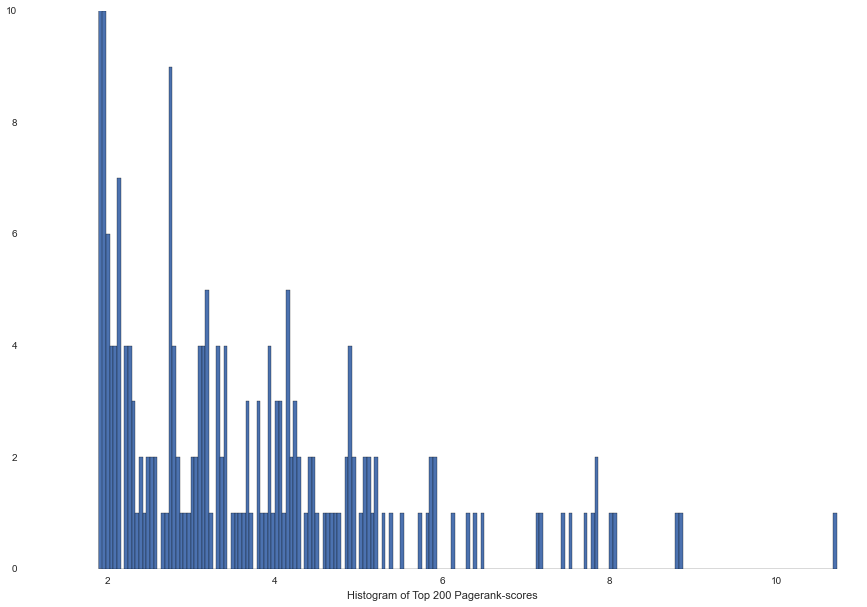

In [9]:
scaled_PageRank_scores =  clusters_df['PageRanks'][:200] * 1000
scaled_PageRank_scores.order().hist(bins = len(clusters_df.index)/2, figsize = (15,10))
plt.xlabel("Histogram of Top 200 Pagerank-scores")
remove_border()